# Project: No-show appointment data analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analysing data associated with patient not showing up for their medical appointments and specific factors that can be put into consideration in predicting if a patient will show up for their scheduled appointment.

>  **We are interested in answering the following questions**.

>1. How effective has the Bolsa Familia scholarship program affected patients turn up for their appointments (considering that they do not have to pay for their treaments).

>2.  What is the relationship between a patients handicap level and missing appointments. 

In [1]:
#Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Loading Data
df_nsa=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_nsa

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


**From the table above we can extract data such as**

>Patient details(ID, gender, age)

>Appointment details(Id, appointment date and the day the appointment was scheduled)

>Possible health issues (Hipertension, diabetes, alcoholism and handicaps in levels from 1 to 4)

> The location of the health facility

> Patients under the Bolsa Familia program

> Patients that received sms' about their appointment 

> Patients No_show status with yes if they did not show up and no if they did.


In [3]:
#to find the general info of each column
df_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*from the details generated, we can see that  the  datatypes for appointmentday and scheduled day  are objects, they should be dates, however since these columns are not going to be part of our analysis, the change in datatype in not neccessary right now.*

In [4]:
#checking for Non-null values in each column
df_nsa.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*From the details above we can clearly see that there are no Non null values in the data columns.*

In [5]:
#checking for general statistical attributes of each column
df_nsa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning based on the requirements to answer the questions posed.

In [6]:
#creating a copy of the data set to work on directly
df_nsa_copy=df_nsa.copy()
df_nsa_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


**df_nsa_copy table generated above allows me to make changes inplace to the data set without affecting the original data set**

In [7]:
# Renaming the No-show column to make it easier to handle
df_nsa_copy.rename(columns= {'No-show':'No_show'}, inplace=True)

**Modifying df_nsa_copy to include a scholarship status column**

In [8]:
#Creating a column that specifies the scholarship status of each Patient
df_nsa_copy['Scholarship_status'] = 'With_scholarship'
df_nsa_copy.loc[df_nsa_copy.Scholarship ==0,'Scholarship_status']="without_scholarship"
df_nsa_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Scholarship_status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,without_scholarship
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,without_scholarship
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,without_scholarship
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,without_scholarship
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,without_scholarship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,without_scholarship
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,without_scholarship
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,without_scholarship
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,without_scholarship


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 :How  much has the Bolsa Familia scholarship program affected patients turn up for their appointments (considering that they do not have to pay for their treaments

In [9]:
#To find the number of patients in the data set who may or may not be under the Bolsa familia program 
df_nsa_copy.groupby('Scholarship_status')['PatientId'].agg(Count = 'count')

,Count
Scholarship_status,
With_scholarship,10861
without_scholarship,99666


**Create a table for NO_show Patients as all comparisons will be used with this table**

In [10]:
#creating a dataframe for patients that did not show up for their appointments
df_nsa_yes=df_nsa_copy[df_nsa_copy['No_show']=='Yes']
df_nsa_yes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Scholarship_status
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,without_scholarship
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,without_scholarship
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,without_scholarship
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes,With_scholarship
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,without_scholarship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes,without_scholarship
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,without_scholarship
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes,without_scholarship
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,without_scholarship


**To find the proportion of patients who do not show up for their appointment in relation to whether or not they are under the program**

>firstly: we must find the total number of patients with scholarships and the total number of patients witout scholarships.

> secondly: we must find the number of No_show patients without scholarship and No_show patients wth scholarship.

>lastly : we will need to divide our results from the second calculation with the first. this will give us the extent to which being under the Bolsa familia program affects whether or not patients show up for their appointments

In [11]:
#First: to find the total number of patients with and without scholarship
df_tot_withschol=df_nsa_copy['Scholarship_status'].value_counts()['With_scholarship']
df_tot_withoutschol = df_nsa_copy['Scholarship_status'].value_counts()['without_scholarship']
df_tot_withschol,df_tot_withoutschol

(10861, 99666)

In [12]:
#Secondly: to find number of patient who did not show up and whether or not they are under a scholarship
df_yes_withschol =df_nsa_yes['Scholarship_status'].value_counts()['With_scholarship']
df_yes_withoutschol =df_nsa_yes['Scholarship_status'].value_counts()['without_scholarship']
df_yes_withschol,df_yes_withoutschol

(2578, 19741)

In [13]:
#divide the first second result by the first
df_prop_withschol=df_yes_withschol/df_tot_withschol
df_prop_withoutschol = df_yes_withoutschol/ df_tot_withoutschol
df_prop_withschol, df_prop_withoutschol

(0.2373630420771568, 0.19807155900708365)

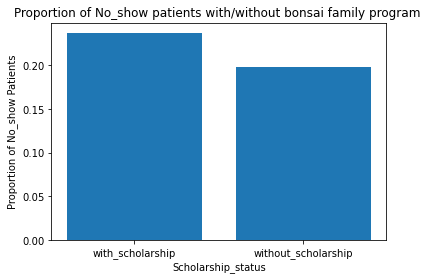

In [14]:
#Plotting a graph that shows this dependency
plt.bar(["with_scholarship","without_scholarship"],[df_prop_withschol, df_prop_withoutschol])
plt.title('Proportion of No_show patients with/without bonsai family program ')
plt.xlabel('Scholarship_status')
plt.ylabel("Proportion of No_show Patients");

*it looks like a higher proportion of patients under the Bolsa familia program were No_show, this indicates that the Bolsa familia program does not seem to contribute in appointment No_shows.*

### Research Question 2 : What is the relationship between a patients handicap level and missing appointments


>We would like find out how much the level of a patients handicap contibutes to being No_show.

> To do this we will have to use scatter plots to compare to check the density of all patients in relation to their handicap level and NO_show Patients in relation to their handicap level

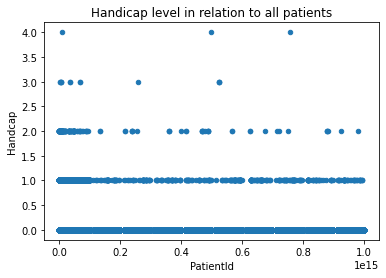

In [15]:
#Handicap level in relation to all patients
df_nsa_copy.plot(x='PatientId', y = 'Handcap',title='Handicap level in relation to all patients', kind='scatter');

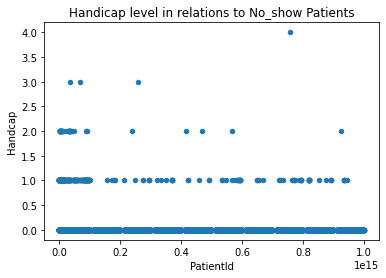

In [16]:
# handicap patients in relations to No_show patients
df_nsa_yes.plot(x='PatientId', y = 'Handcap',title='Handicap level in relations to No_show Patients', kind='scatter');

*it looks as though the number of No_show patients reduces as their Handicap level increases.*

<a id='conclusions'></a>
## Conclusions

> **From the result of the first question:** 
Amongst the No_show patients, Patients under the Bolsa familia program tend not to show up for their appointments although they do not have to pay for their treatment, this implies that the Bolsa Familia program does not greatly affect the tendency of a patient not showing up for an appointment

> **From the result of the second question**:
We can see that although most patients are not handicapped, the number of No_show patients reduces as the handicap level increase. thus a patient with a handicap of level 4 is more likely to show up for their appointments than a patient with a handicap level of 1


## Limitations:
>In this project, our analysis is limited to comparing No_show patients records and General patients records. None No_show patients were not considered as part of this analysis. also Other diseases the patients may have are not considered, other factors such as age, sex and forgetfulness(whether or not a reminder text was sent) and location of the health facility were not considered.

## References:
https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

https://datagy.io/pandas-mean-average/